In [428]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [79]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


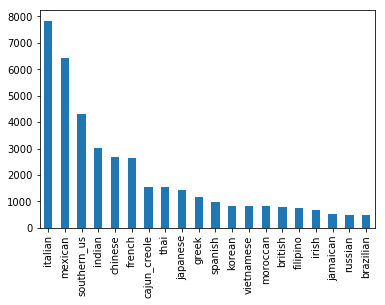

In [80]:
train['cuisine'].value_counts().plot(kind='bar')
plt.show()

In [81]:
counters = {}
for cuisine in train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (train['cuisine'] == cuisine)
    for ingredients in train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [82]:
counters['indian'].most_common(10)

[('salt', 1934),
 ('onions', 1195),
 ('garam masala', 862),
 ('water', 820),
 ('ground turmeric', 728),
 ('garlic', 726),
 ('cumin seed', 697),
 ('ground cumin', 683),
 ('vegetable oil', 593),
 ('oil', 546)]

In [83]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [429]:
train['all_ingredients'] = train['ingredients'].map(";".join)
train['all_ingredients'].head()

0    romaine lettuce;black olives;grape tomatoes;ga...
1    plain flour;ground pepper;salt;tomatoes;ground...
2    eggs;pepper;salt;mayonaise;cooking oil;green c...
3                       water;vegetable oil;wheat;salt
4    black pepper;shallots;cornflour;cayenne pepper...
Name: all_ingredients, dtype: object

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word',token_pattern = r'[^;]+')
train_x = cv.fit_transform(train['all_ingredients'])


In [116]:
train_x

<39774x6698 sparse matrix of type '<class 'numpy.int64'>'
	with 428249 stored elements in Compressed Sparse Row format>

In [117]:
train_y = train['cuisine']

In [118]:
from sklearn.preprocessing import LabelEncoder as le
le = le()
train_y = le.fit_transform(train_y)
train_y

array([ 6, 16,  4, ...,  8,  3, 13], dtype=int64)

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

In [120]:
from sklearn.svm import SVC
model = SVC(C=100)
model.fit(x_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,make_scorer
scorer = make_scorer(accuracy_score)
score = cross_val_score(model,y_test,scoring=scorer)

score

array([ 0.61691729,  0.60716981,  0.59470699])

In [122]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)

In [123]:
model.fit(x_train,y_train)
score = cross_val_score(model,x_test,y_test,scoring=scorer)
score

array([ 0.64699248,  0.64490566,  0.65141777])

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
score = cross_val_score(model,x_test,y_test,scoring=scorer)
score

array([ 0.72255639,  0.71320755,  0.7047259 ])

In [125]:
cv.vocabulary_.keys()

dict_keys(['cannelloni shel', 'nonfat ricotta chees', 'low-fat deli ham', 'india pale al', 'betty crockerâ„¢ oatmeal cookie mix', 'chicken stock', 'clam', 'poppy seed fil', 'less sodium soy sauc', 'sherri', 'gluten-free chicken stock', 'nielsen-massey vanilla extract', 'lemon pepp', 'mahimahi', 'garlic clov', 'bone marrow', 'red bell pepp', 'cassis liqueur', 'frozen mini ravioli', 'low sodium fat free vegetable broth', 'boneless pork should', 'sports drink', 'pepita', 'chopped parsley', 'full fat coconut milk', 'frozen pea', 'idaho potato', 'kohlrabi', 'pizza sauc', 'long grain white ric', 'medium shrimp', 'citrus peel', 'frozen fruit', 'biscotti', 'chinese sesame past', 'reduced sodium smoked ham', 'dried sag', 'day old bread', 'black bean sauce with garl', 'veal cutlet', 'wood mushroom', 'mexican cooking sauc', 'cream chees', 'mineral wat', 'icing mix', 'crushed pretzel', 'holland house white wine vinegar', 'oleo', 'barilla', 'mandarin pancak', 'half & half', 'skippy creamy peanut bu

In [126]:
len(cv.vocabulary_.keys())

6698

In [190]:
#There are ingredients which or mis-spelt or refer the same ingredient like strawberri , strawberry, strwaberries
#We might get better results by stemming and correcting spelling mistakes
from nltk.stem import PorterStemmer
ps = PorterStemmer()

#example of what stemmer can do
arr = ['strawberry','strawberri','strawberries']
for x in arr:
    print(ps.stem(x))
    

strawberri
strawberri
strawberri


In [187]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#example of what lemmatization can do can do
arr = ['strawberry','strawberri','strawberries']
for x in arr:
    print(wordnet_lemmatizer.lemmatize(x))
    


strawberry
strawberri
strawberry


In [390]:
q= "romaine lettuce;black olives;grape tomatoes;Chinese egg"
s=[]

for z in q.split(";"):    
    words = [y for y in pos_tag(z.split())]    
    #words = [y[0] for y in pos_tag(z.split()) if y[1] in ["NN","NNP","NNS","FW"]]
    #s.append(' '.join([ps.stem(wordnet_lemmatizer.lemmatize(y)) for y in words]))

#';'.join(s)
words

[('Chinese', 'JJ'), ('egg', 'NN')]

In [430]:
from nltk import pos_tag
def process_ingredients(row):
    s=[]
    for x in row['all_ingredients'].split(";"):
        words = [y[0] for y in pos_tag(x.split()) if y[1] in ["NN","NNP","NNS","FW"]]
        s.append(' '.join([ps.stem(wordnet_lemmatizer.lemmatize(y)) for y in x.split()]))
    return ';'.join(s)     

train['all_ingredients'] = train.apply(process_ingredients,axis=1)
train['all_ingredients'].head()

0    romain lettuc;black oliv;grape tomato;garlic;p...
1    plain flour;ground pepper;salt;tomato;ground b...
2    egg;pepper;salt;mayonais;cook oil;green chili;...
3                           water;veget oil;wheat;salt
4    black pepper;shallot;cornflour;cayenn pepper;o...
Name: all_ingredients, dtype: object

In [431]:
train['all_ingredients'].head()

cv = CountVectorizer()


In [432]:
#train['all_ingredients'] = train['all_ingredients'].map(";".join)


train_x = cv.fit_transform(train['all_ingredients'])
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)
cv.vocabulary_.keys()

dict_keys(['balsamico', 'tomat', 'cracker', 'crunch', 'clam', 'kasha', 'muscat', 'membrillo', 'sherri', 'cereal', 'hyssop', 'mahimahi', 'pineappl', 'gourmet', 'vine', 'pepita', 'stem', 'lima', 'bocconcini', 'marsala', 'oven', 'cure', 'oreoâ', 'tomatoes', 'crisp', 'biscotti', 'demi', 'tater', 'masago', 'massaman', 'coca', 'imo', 'pepperidg', 'myzithra', 'mirliton', 'anejo', 'oleo', 'freshli', 'barilla', 'strozzapreti', 'gingersnap', 'sardin', 'espelett', 'lambic', 'komatsuna', 'top', 'corn', 'grana', 'ceylon', 'oli', 'anchovi', 'strip', 'eggrol', 'meatbal', 'guava', 'chickpea', 'hot', 'lea', 'curli', 'creationsâ', 'gnocchetti', 'rin', 'natur', 'dumpl', 'bud', 'garam', 'flank', 'lb', 'stolichnaya', 'salt', 'frost', 'vineyard', 'grate', 'sunflow', 'soman', 'kewra', 'chanterel', 'white', 'haa', 'bone', 'hemp', 'cotto', 'curl', 'vanilla', 'valencia', 'pilsner', 'topping', 'velveeta', 'kale', 'candi', 'wish', 'durum', 'consomm', 'concentrate', 'sichuanes', 'moss', 'fontina', 'honeycomb', 'sm

In [433]:
model = LogisticRegression()
model.fit(x_train,y_train)
score = cross_val_score(model,x_test,y_test,scoring=scorer)
score

array([ 0.73438676,  0.72775264,  0.72967864])

In [434]:
len(cv.vocabulary_.keys())

2721

In [435]:
# ingredients_string = train['all_ingredients'].str.cat(sep=";")
# from fuzzywuzzy import process
# ingredients = {}
#for x in ingredients_string.split():
from sklearn.grid_search import GridSearchCV
parameters = {'C':[1,2,10,100]}

clf = LogisticRegression()
model = GridSearchCV(clf, parameters)
model = model.fit(x_train,y_train)
score = cross_val_score(model,x_test,y_test,scoring=scorer)
score
    
    


array([ 0.73438676,  0.72775264,  0.72967864])

In [436]:
model = model.fit(train_x,train_y)

In [437]:
test['all_ingredients'] = test['ingredients'].map(";".join)
test['all_ingredients']  = test.apply(process_ingredients,axis=1)
x_test = cv.transform(test['all_ingredients'])
y_pred = model.predict(x_test)
test['cuisine'] = le.inverse_transform(y_pred)
test.head()

,id,ingredients,all_ingredients,cuisine
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",bake powder;egg;all-purpos flour;raisin;milk;w...,british
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar;egg yolk;corn starch;cream of tartar;ban...,southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausag link;fennel bulb;frond;oliv oil;cuban p...,italian
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cut;file powder;smoke sausag;okra;shrimp;...,cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper;salt;sausag case;leek;parm...,italian


In [439]:
test.to_csv('submission1.csv',columns=['id','cuisine'],index =False)